# Введение в высшую математику
### Практическое задание №6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.linalg  

%matplotlib inline

### 1. Решите линейную систему:

## $\left|
\begin{array}{cccc}
1 & 2 & 3\\
4 & 0 & 6\\
7 & 8 & 9
\end{array}
\right|X=
\left| 
\begin{array}{cccc}
12\\ 
2\\ 
1
\end{array} 
\right|
$

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

### 2. Найдите псевдорешение:
x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15

## $\left(
\begin{array}{cccc}
1 & 2 & -1\\
3 & -4 & 0\\
8 & -5 & 2\\
2 & 0 & -5\\
11 & 4 & -7
\end{array}
\right)
\left(
\begin{array}{cccc}
x\\
y\\
z
\end{array}
\right)=
\left(
\begin{array}{cccc}
1\\
7\\
12\\
7\\
15
\end{array}
\right)
$

In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [4]:
np.dot(A, [ 1.13919353, -0.90498444, -0.9009803]) - B

array([-0.76979505,  0.03751835, -0.16349016, -0.21671144,  0.21805317])

### 3. Сколько решений имеет линейная система:

## $\left|
\begin{array}{cccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{array}
\right|X=
\left| 
\begin{array}{cccc}
12\\ 
2\\ 
1
\end{array} 
\right|
$

### Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A, B.T), axis=1)
print(C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


(2, 3)

Ранг основной матрицы меньше ранга расширенной - система несовместна. Ранг меньше числа неизвестных - имеется бесконечное число решений.

Меняем:
## $\left|
\begin{array}{cccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{array}
\right|X=
\left| 
\begin{array}{cccc}
0\\ 
0\\ 
0
\end{array} 
\right|
$

In [6]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[0, 0, 0]])
C = np.concatenate((A, B.T), axis=1)
print(C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[1 2 3 0]
 [4 5 6 0]
 [7 8 9 0]]


(2, 2)

Ранг основной матрицы равен рангу расширенной - система совместна и имеет единственное решение.

In [7]:
B = np.array([0, 0, 0])
np.linalg.solve(A, B)

array([ 0.,  0., -0.])

### 4. Вычислите LU-разложение матрицы:

## $\left[
\begin{array}{cccc}
1 & 2 & 3\\
2 & 16 & 21\\
4 & 28 & 73
\end{array}
\right]
$

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.


In [8]:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)
print( np.dot(P, A) - np.dot(L, U) )  # материалы лекции устарели.  тут не P*A=L*U
print( np.dot(P, np.dot(L, U)) )      # в текущей версии библиотеки подразумевается A=P*L*U

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[ -2. -12. -52.]
 [  3.  26.  70.]
 [ -1. -14. -18.]]
[[ 1.  2.  3.]
 [ 2. 16. 21.]
 [ 4. 28. 73.]]


In [9]:
B = np.array([10, 20, 30])
np.linalg.solve(A, B)

array([10.13888889,  0.34722222, -0.27777778])

### 5. Найдите нормальное псевдорешение недоопределенной системы:

x + 2y – z = 1

8x – 5y + 2z = 12

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

```
x + 2y – z = 1         *2        + => (2)
8x – 5y + 2z = 12

2x + 4y – 2z = 2       i+ii      + => (1)
8x – 5y + 2z = 12

(1)    10x - y = 14           =>   y = 10x - 14
(2)    z = x + 2y - 1

Итого система:
y = 10x - 14
z = x + 2y - 1
```

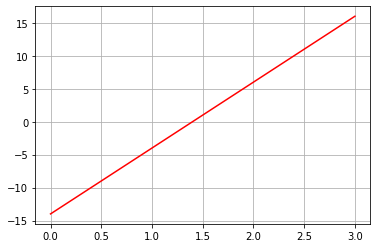

In [10]:
x = np.linspace(0, 3, 201)
y = 10*x - 14
plt.plot(x,y,color = 'red')
plt.grid(True)
plt.show()

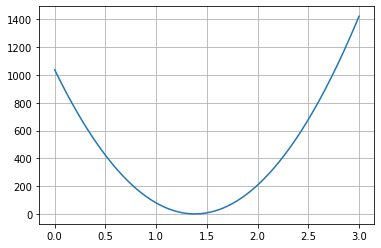

In [11]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

plt.plot(x, Q(x, y, x + 2*y -1))
plt.grid(True)
plt.show()



In [12]:
A = np.array([[1,2,-1],[8,-5,2]])
B = np.array([1,12])
np.linalg.lstsq(A,B, rcond=None)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

### 6. Найдите одно из псевдорешений вырожденной системы:

## $\left|
\begin{array}{cccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{array}
\right|\cdot X=
\left| 
\begin{array}{cccc}
2\\ 
5\\ 
11
\end{array} 
\right|
$

Попробуйте также отыскать и нормальное псевдорешение.


In [13]:
A = np.array([[1,2,3], [4,5,6],  [7,8,9]])
B = np.array([2,5,11])
B2 = np.array([[2,5,11]])
C = np.concatenate((A, B2.T), axis=1)

print(A)
print(C)
print(np.linalg.det(A), np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001) )

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3  2]
 [ 4  5  6  5]
 [ 7  8  9 11]]
-9.51619735392994e-16 2 3


In [14]:
Q,R = np.linalg.qr(A)
print(Q)
print(R)

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [15]:
print(np.dot(Q,R))
print(np.dot(np.transpose(Q), Q))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.00000000e+00 -5.26517217e-16 -2.55176183e-16]
 [-5.26517217e-16  1.00000000e+00  3.37757775e-16]
 [-2.55176183e-16  3.37757775e-16  1.00000000e+00]]


In [16]:
R1 = R[:2, :2]
B1 = np.dot(np.transpose(Q), B)[:2]
X1 = np.linalg.solve(R1, B1)
print(R1)
print(B1)
print(X1)

[[-8.1240384  -9.6011363 ]
 [ 0.          0.90453403]]
[-1.21860576e+01  8.54871729e-15]
[1.50000000e+00 9.45096256e-15]


In [17]:
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


1.4999999999999893

In [18]:
np.linalg.norm(np.dot(A, X) - B)

1.2247448713915885

#### Попробуйте также отыскать и нормальное псевдорешение.

In [19]:
np.linalg.lstsq(A,B, rcond=None)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [20]:
X = np.array([1.25, 0.5, -0.25])
np.linalg.norm(X),  np.linalg.norm(np.dot(A, X) - B)   

(1.3693063937629153, 1.224744871391589)